In [1]:
pip install pandas numpy matplotlib statsmodels


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error


In [3]:
# Load the data
data = {
    'State/Union Territory': ['Andhra Pradesh', 'Arunachal Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'NCT of Delhi', 'Goa', 'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir', 'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur', 'Meghalaya', 'Mizoram', 'Nagaland', 'Odisha', 'Puducherry', 'Punjab', 'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura', 'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'ALL INDIA'],
    '2004': [5377.8, 135, 3470.7, 2472.2, 4383.3, 14.3, 145.2, 1238.2, 3023, 122, 492.2, 1677, 3547, 667.1, 1169, 2164, 435.9, 193.7, 104.1, 259.8, 6466, 65.7, 10437, 150.4, 21.6, 5062.2, 4223.2, 545.1, 9555.6, 572, 14884.8, 83131.7],
    '2005': [6555.7, 146.2, 3552.5, 3495.5, 5011.6, 24, 147.3, 1298, 3210, 112.1, 556.8, 1558, 5744, 629.9, 1656.3, 2695, 386.1, 151.9, 99.2, 263.1, 6859, 59.9, 10193, 153, 21.5, 5220, 5148.2, 552.9, 11133.7, 590, 14510.8, 91793.4],
    '2006': [6649.9, 146.2, 2916, 4989.3, 5041.4, 31.1, 130.3, 1390, 3371, 123.5, 554, 2967.8, 3446, 631, 1368.4, 2569, 386.1, 200.2, 29.5, 263.5, 6824.7, 59.9, 10138, 169.8, 21.5, 6610.6, 5222.1, 620.5, 11124, 556, 14745.9, 93355.3],
    '2007': [7463.2, 158.1, 3319, 4418.1, 5426.6, 31.4, 121.6, 1474, 3613, 121.5, 561.3, 3336.4, 3717, 528.5, 1461.9, 2996, 406.2, 200, 15.7, 290.6, 7540.7, 53.4, 10489, 259.6, 22.9, 5040.2, 5860.7, 624.6, 11780, 593, 14719.5, 96692.9],
    '2008': [7976.8, 163.9, 4008.5, 5590.3, 4391.8, 31.4, 123.3, 1303, 3298, 118.3, 563.1, 3420.2, 3802, 590.3, 1559.7, 2284, 397, 203.9, 46, 345.1, 6812.7, 50.8, 11000, 241.1, 21.7, 5182.7, 6264.2, 627.1, 13097, 582, 15037.3, 99182.5],
    '2009': [5902.7, 215.8, 4335.9, 3599.3, 4110.4, 19.3, 100.6, 1292, 3625, 105.9, 497.4, 1538.4, 3691, 598.3, 1260.6, 2183, 319.9, 206.7, 44.3, 240.3, 6917.5, 52.4, 11236, 228.3, 24.3, 5665.2, 4635.3, 640, 10807.1, 608, 14340.7, 89092.9],
    '2010': [7882.4, 234, 4736.6, 3102.1, 6159, 19.6, 115, 1496.6, 3472, 128.9, 507.7, 1110, 4188, 522.7, 1772.1, 2696, 521.7, 207, 47.2, 381.4, 6827.7, 52, 10837, 265.5, 21, 5792.4, 6535.6, 702.5, 11992, 550.4, 13045.9, 95979.8],
    '2011': [7746.2, 255, 4516.3, 7162.6, 6028.4, 19.8, 121.8, 1790, 3759, 131.6, 544.7, 3130.6, 3955, 569, 2227.3, 2841, 591, 216.5, 54.3, 382.4, 5807, 42.1, 10542, 253.4, 20.9, 7458.7, 5148.8, 718.3, 14022, 594, 14605.8, 105310.9],
    '2012': [6862.4, 263, 5128.5, 7529.3, 6608.8, 19.7, 122.8, 1541, 3976, 125.3, 818.1, 3164.9, 3364, 508.3, 2775, 3057, 257.6, 232, 30.5, 405.2, 7295.5, 46.5, 11374, 222.5, 21.3, 4049.9, 4647.6, 713.2, 14416, 579.8, 15023.7, 105231.6],
    '2013': [6969.7, 276.2, 4927.1, 5505.8, 6716.4, 29.6, 126.5, 1636, 3998, 120.8, 610.9, 2810.6, 3572.6, 509.2, 2844.8, 3120, 398.5, 273.9, 59, 429.6, 7613.4, 49.8, 11267, 312.6, 20.3, 5349.8, 5755, 711.8, 14636, 578.6, 15370.7, 106645.5],
    '2014': [7233.9, 285, 5222.7, 6356.7, 6322.1, 25.9, 120.5, 1830.9, 4006, 125.2, 517.2, 3361.9, 3541, 562.1, 3625.3, 2946, 334.1, 298.2, 60.7, 454.2, 8298.2, 52.7, 11107, 366.7, 20.1, 5727.8, 4440.8, 747, 12167.9, 603.7, 14677.2, 104798.5],
    '2015': [7488.7, 204, 5125.1, 6802.2, 5789.4, 17.3, 115.1, 1702, 4145, 129.9, 646.4, 2882.2, 3021, 549.3, 3546.7, 2593, 338.8, 301.1, 62.1, 318.8, 5875.4, 43.9, 11823, 369.8, 13.1, 7517.1, 3047, 794.8, 12501, 639.1, 15953.9, 104408.2],
    '2016': [7452.4, 220, 4727.4, 8239.3, 8048.4, 17.3, 113.2, 1930, 4453, 146.6, 572.2, 3841.8, 2604.8, 437.1, 4226.8, 3109.5, 430.4, 203, 61.5, 336.7, 8325.9, 52.2, 11586.2, 452.87, 19.7, 2369.4, 5173.4, 814.6, 13754, 630, 15302.5, 109698.4],
    '2017': [8166.2, 233.3, 5283.7, 8093.1, 4930.8, 16.8, 103, 1890.9, 4523.38, 114.79, 513.14, 4078.04, 3017.1, 521.3, 4123.9, 2730.8, 607.8, 304.6, 59.6, 349.6, 6551.3, 42.5, 13381.79, 450.87, 17.63, 6638.9, 6262.2, 812.1, 13274, 646.7, 14967, 112757.6],
    '2018': [8234.7, 240, 5220.6, 6155.5, 6526.9, 16.8, 98.8, 1912.1, 4516.1, 114.9, 615.8, 2893.9, 3431, 578.3, 4494.7, 3275.7, 401.6, 202, 60, 356.7, 7733.7, 63.3, 12821.6, 453.2, 17.2, 6130.9, 6670, 793.2, 15545.3, 617.6, 16242.2, 116477.8],
    '2019': [8658.9, 244.7, 4984.6, 6298, 6774.8, 16.8, 90.4, 1983.1, 4824.3, 143.8, 587, 3012.8, 3634.5, 605.6, 4778.2, 2897.6, 385.5, 303.4, 62.2, 363.3, 8360.4, 59.4, 11779.3, 480.5, 16.1, 7171.1, 7427.8, 810.2, 15517.8, 658.4, 15881.4, 118870.3],
    '2020': [7882.9, 247.1, 5214.8, 6747, 7161.2, 19.8, 87.3, 2145.7, 4424.9, 140.5, 581.5, 2752.9, 4291.8, 633.8, 4413.8, 3291.7, 602.2, 295.9, 60.9, 367.4, 8810.3, 50, 12783.7, 634, 16.2, 6881.2, 10217.1, 803.1, 15271.5, 714.9, 16524.4, 124368.3],
    '2021': [7763.6, 252.4, 4382.1, 7717, 8021.7, 19, 90.4, 2101.1, 4618, 167.5, 492.9, 2930.5, 4318.4, 487, 4814.9, 3598.1, 567.4, 297.3, 60, 150.7, 9290.8, 57.1, 12885.5, 478.6, 16, 7906.6, 12409.6, 811, 16728.7, 716.1, 129471.4, 129471.4]
}

In [4]:
# Create a DataFrame
df = pd.DataFrame(data)


In [5]:
# Set the 'State/Union Territory' column as index
df.set_index('State/Union Territory', inplace=True)

In [6]:
# Transpose the DataFrame
df = df.T

In [7]:
# Convert index to datetime
df.index = pd.to_datetime(df.index, format='%Y')


In [8]:
# Define a function to fit ARIMA model and make predictions
def fit_arima(series, order):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    forecast = model_fit.forecast(steps=5)
    return forecast


In [9]:
# Define function to evaluate ARIMA model
def evaluate_arima(series, order):
    # Split data into train and test sets
    train_size = int(len(series) * 0.8)
    train, test = series[0:train_size], series[train_size:]

    # Fit model
    history = [x for x in train]
    predictions = []
    for t in range(len(test)):
        model = ARIMA(history, order=order)
        model_fit = model.fit()
        yhat = model_fit.forecast()[0]
        predictions.append(yhat)
        history.append(test[t])

    # Calculate RMSE
    rmse = np.sqrt(mean_squared_error(test, predictions))
    return rmse

In [ ]:
# Iterate over each state and fit ARIMA model
predictions = {}
for state in df.columns:
    series = df[state]
    best_rmse, best_order = float('inf'), None
    for p in range(3):
        for d in range(3):
            for q in range(3):
                order = (p, d, q)
                try:
                    rmse = evaluate_arima(series, order)
                    if rmse < best_rmse:
                        best_rmse, best_order = rmse, order
                except:
                    continue
    if best_order:
        forecast = fit_arima(series, best_order)
        predictions[state] = forecast.tolist()

# Display predictions
for state, forecast in predictions.items():
    print(f"Predictions for {state}: {forecast}")

# Plotting actual vs predicted values for a state
state_name = 'ALL INDIA'
plt.figure(figsize=(10, 6))
plt.plot(df.index, df[state_name], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=6, freq='Y')[1:], predictions[state_name], label='Predicted')
plt.title(f"Actual vs Predicted values for {state_name}")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()

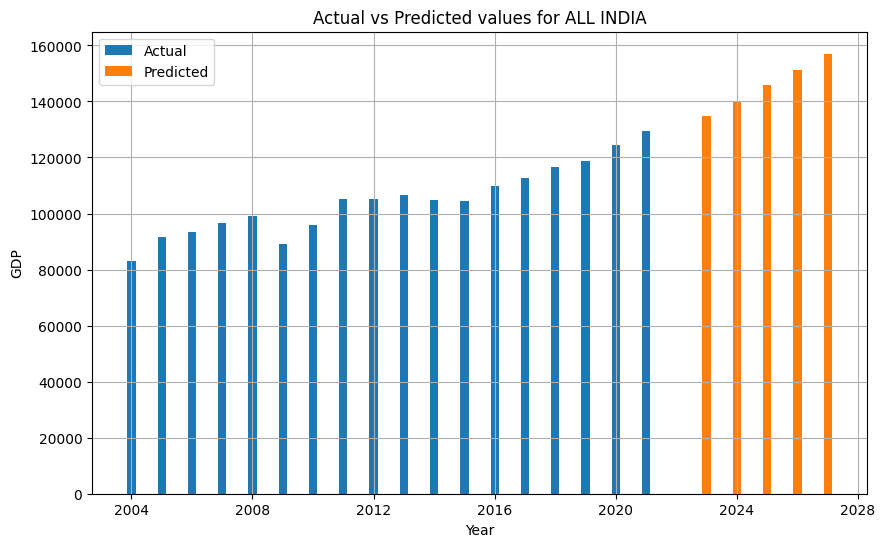

In [18]:
state_name = 'ALL INDIA'
plt.figure(figsize=(10, 6))
plt.bar(df.index, df[state_name], label='Actual', width=100)
plt.bar(pd.date_range(start=df.index[-1], periods=6, freq='Y')[1:], predictions[state_name], label='Predicted', width=100)
plt.title(f"Actual vs Predicted values for {state_name}")
plt.xlabel('Year')
plt.ylabel('GDP')
plt.legend()
plt.grid(True)
plt.show()


NameError: name 'data' is not defined